In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, shapiro, kstest
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('files/data-hotel.csv', index_col=0)

In [3]:
#df_canceladas = df[df['is_canceled'] == True]


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'courtesy',
       'arrival_date'],
      dtype='object')

In [5]:
#df_canceladas['agent'].unique()

In [6]:
df_agentes = df[ (df['agent'] == '9.0') | (df['agent'] == '1.0') ]


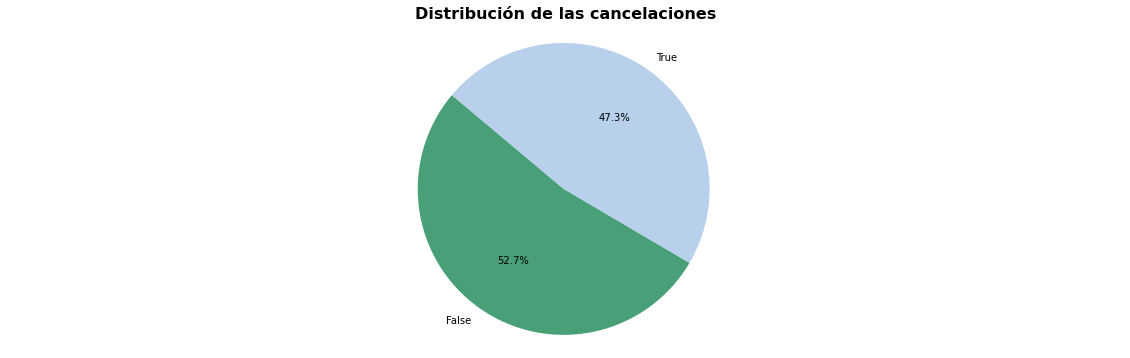

In [7]:
cancelaciones = df_agentes["is_canceled"].value_counts()

plt.figure(figsize=(20, 6))
plt.pie(cancelaciones.values, 
        labels=cancelaciones.index, 
        autopct='%1.1f%%', 
        colors=["#49a078", "#b8d0eb"],
        startangle=140)
plt.axis('equal')
plt.title('Distribución de las cancelaciones', fontsize = 16, fontweight = "bold");

In [14]:
canceladas = df[df['is_canceled'] == True]



In [20]:
canceladas.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
8,Resort Hotel,True,85,27,0,3,2,0,0,BB,Portugal,Undefined,Undefined,False,0,0,A,A,0,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,False,2015-7-1
9,Resort Hotel,True,75,27,0,3,2,0,0,HB,Undefined,Undefined,TA/TO,False,0,0,D,D,0,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,False,2015-7-1
10,Resort Hotel,True,23,27,0,4,2,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,E,E,0,240.0,0,Undefined,123.0,0,0,Canceled,2015-06-23,False,2015-7-1
27,Resort Hotel,True,60,27,2,5,2,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,Undefined,E,0,240.0,0,Undefined,107.0,0,2,Canceled,2015-05-11,False,2015-7-1
32,Resort Hotel,True,96,28,2,8,2,0,0,BB,Portugal,Direct,Direct,False,0,0,E,E,0,Undefined,0,Transient,108.3,0,2,Canceled,2015-05-29,False,2015-7-1


In [22]:
canceladas.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'courtesy',
       'arrival_date'],
      dtype='object')

In [23]:


# Datos
grupos = df['is_canceled']
agente9 = df['agent'] == '9.0'
agente1 = df['agent'] == '1.0'

fig, ax = plt.subplots()

# Gráfico de barras apiladas
ax.bar(grupos, agente9)
ax.bar(grupos, agente1, bottom = agente9)

# plt.show() 
 


In [ ]:
sns.barplot(data=canceladas, x='arrival_date', y='is_canceled', hue='agent')

plt.title('Flight Cancellations by Agent and Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.legend(title='Agent')

# Display the chart
plt.show()